In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
statement_dates = pd.read_csv('sentiment_dates.csv')
spx = pd.read_csv('.\index_data\$SPX.csv',parse_dates=['Date'])

In [4]:
dateparse = lambda x: pd.datetime.strptime(x, '%d%m%Y')
state_date_parse = lambda x: pd.datetime.strptime(x, '%Y%m%d')
spx['Date']=spx['Date'].apply(dateparse)

In [5]:
spx=spx.set_index(['Date'])

Dropping unneeded columns (Open interest, ticker) and limiting time frame of data

In [6]:
spx.drop(columns=['Open Interest','Ticker'], inplace=True)
spx = spx['2000-01-01':]


Applying date parsing process

In [7]:
statement_dates['Statement']=np.ones(len(statement_dates))

statement_dates['Dates']=statement_dates['Dates'].apply(lambda x : str(x))

statement_dates['Dates']=statement_dates['Dates'].apply(state_date_parse)

statement_dates['Statement']=statement_dates['Statement'].apply(lambda x : int(x))

statement_dates=statement_dates.set_index(['Dates'])
statement_dates=statement_dates.drop('Unnamed: 0',axis=1)


In [8]:

spx_statements =spx.join(statement_dates, how='outer')


In [9]:
spx_statements = spx_statements[:'2019-03-01']

In [10]:
spx_statements[['Summary of Econ Projections','Statement']]=spx_statements[['Summary of Econ Projections','Statement']].fillna(0)

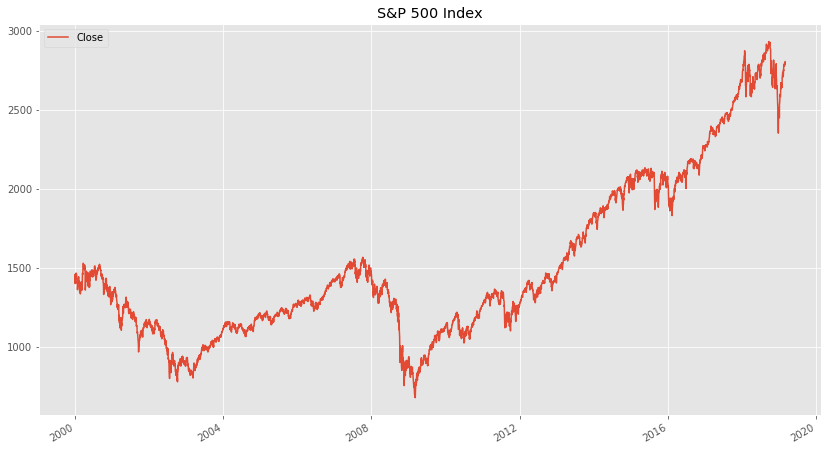

In [11]:
spx_statements.plot(y='Close',figsize=(14,8),title= 'S&P 500 Index')

In [12]:
spx_statements['Close'].idxmin() 

Timestamp('2009-03-09 00:00:00')

In [13]:
spx_statements['2010-05-08':'2010-05-12']

,Open,High,Low,Close,Volume,Summary of Econ Projections,polarity,subjectivity,LM_POS,LM_neg,CB_POS,CB_neg,word_count,Statement
2010-05-09,NaN,NaN,NaN,NaN,NaN,0.0,0.028333,0.257667,1.0,2.0,1.0,2.0,267.0,1.0
2010-05-10,1122.27002,1163.84998,1122.27002,1159.72998,5.925800e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-05-11,1156.39001,1170.47998,1147.70996,1155.79004,4.776800e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-05-12,1155.43005,1172.87000,1155.43005,1171.67004,4.323200e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [14]:
spx_statements['close_pct_change']=spx_statements.pct_change()['Close'].shift(-1)
spx_statements['prev_close_change']=spx_statements.pct_change()['Close']

In [15]:
spx_statements.head()

,Open,High,Low,Close,Volume,Summary of Econ Projections,polarity,subjectivity,LM_POS,LM_neg,CB_POS,CB_neg,word_count,Statement,close_pct_change,prev_close_change
2000-01-03,1469.25000,1478.00000,1438.35999,1455.17004,1.153700e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.038312,NaN
2000-01-04,1455.21997,1455.21997,1397.43005,1399.42004,1.216500e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001922,-0.038312
2000-01-05,1399.42004,1413.27002,1377.68005,1402.10999,1.422400e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000956,0.001922
2000-01-06,1402.10999,1411.90002,1392.02002,1403.44995,1.322900e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.027090,0.000956
2000-01-07,1403.44995,1441.46997,1400.72998,1441.46997,1.472800e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.011190,0.027090


In [16]:
spx_statements['two_pct_change']=spx_statements['Close'].pct_change(periods=2)
spx_statements['two_pct_change']=spx_statements['two_pct_change'].shift(periods=-2)

spx_statements['three_pct_change']=spx_statements['Close'].pct_change(periods=3)
spx_statements['three_pct_change']=spx_statements['three_pct_change'].shift(periods=-3)

spx_statements['four_pct_change']=spx_statements['Close'].pct_change(periods=4)
spx_statements['four_pct_change']=spx_statements['four_pct_change'].shift(periods=-4)

spx_statements['five_pct_change']=spx_statements['Close'].pct_change(periods=5)
spx_statements['five_pct_change']=spx_statements['five_pct_change'].shift(periods=-5)

spx_statements.head()

,Open,High,Low,Close,Volume,Summary of Econ Projections,polarity,subjectivity,LM_POS,LM_neg,CB_POS,CB_neg,word_count,Statement,close_pct_change,prev_close_change,two_pct_change,three_pct_change,four_pct_change,five_pct_change
2000-01-03,1469.25000,1478.00000,1438.35999,1455.17004,1.153700e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.038312,NaN,-0.036463,-0.035542,-0.009415,0.001670
2000-01-04,1455.21997,1455.21997,1397.43005,1399.42004,1.216500e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.001922,-0.038312,0.002880,0.030048,0.041574,0.027969
2000-01-05,1399.42004,1413.27002,1377.68005,1402.10999,1.422400e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000956,0.001922,0.028072,0.039576,0.025997,0.021346
2000-01-06,1402.10999,1411.90002,1392.02002,1403.44995,1.322900e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.027090,0.000956,0.038584,0.025017,0.020371,0.032940
2000-01-07,1403.44995,1441.46997,1400.72998,1441.46997,1.472800e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.011190,0.027090,-0.002019,-0.006542,0.005696,0.016428


In [17]:
spx_statements['open_pct_change']=spx_statements['Open'].pct_change()


In [18]:
spx_statements['2010-05-08':'2010-05-12']

,Open,High,Low,Close,Volume,Summary of Econ Projections,polarity,subjectivity,LM_POS,LM_neg,...,CB_neg,word_count,Statement,close_pct_change,prev_close_change,two_pct_change,three_pct_change,four_pct_change,five_pct_change,open_pct_change
2010-05-09,NaN,NaN,NaN,NaN,NaN,0.0,0.028333,0.257667,1.0,2.0,...,2.0,267.0,1.0,0.043974,0.000000,0.040427,0.054722,0.041913,0.022325,0.000000
2010-05-10,1122.27002,1163.84998,1122.27002,1159.72998,5.925800e+09,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,-0.003397,0.043974,0.010296,-0.001975,-0.020738,-0.019651,-0.004232
2010-05-11,1156.39001,1170.47998,1147.70996,1155.79004,4.776800e+09,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.013740,-0.003397,0.001428,-0.017399,-0.016309,-0.030274,0.030403
2010-05-12,1155.43005,1172.87000,1155.43005,1171.67004,4.323200e+09,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,-0.012145,0.013740,-0.030717,-0.029642,-0.043417,-0.048324,-0.000830


Error: one statement was released on Sunday, no comparable price change. 
This date was a Sunday. Push Effects forward

In [19]:
pd.DataFrame(spx_statements[spx_statements['Statement']==1]['close_pct_change'].describe())

,close_pct_change
count,163.000000
mean,-0.001138
std,0.015314
min,-0.076167
25%,-0.008770
50%,-0.000053
75%,0.006158
max,0.043974


In [20]:
pd.DataFrame(spx_statements['close_pct_change'].describe())

,close_pct_change
count,4820.000000
mean,0.000209
std,0.012039
min,-0.090350
25%,-0.004800
50%,0.000531
75%,0.005686
max,0.115800


In [21]:
pd.DataFrame(spx_statements[spx_statements['Statement']==0]['close_pct_change'].describe())

,close_pct_change
count,4657.000000
mean,0.000256
std,0.011908
min,-0.090350
25%,-0.004716
50%,0.000539
75%,0.005658
max,0.115800


In [22]:
pd.DataFrame({'LM_POS':spx_statements[spx_statements['Statement']==1]['LM_POS'].describe(),
              'LM_neg':spx_statements[spx_statements['Statement']==1]['LM_neg'].describe()})

,LM_POS,LM_neg
count,163.000000,163.000000
mean,7.785276,7.134969
std,5.112008,5.285101
min,0.000000,0.000000
25%,4.000000,3.000000
50%,7.000000,7.000000
75%,10.000000,10.000000
max,28.000000,31.000000


In [23]:
spx_statements[spx_statements['Statement']==1].describe().drop(columns=['Open','High','Low','Close',
                                                                        'Volume','Summary of Econ Projections',
                                                                        'Statement'])

,polarity,subjectivity,LM_POS,LM_neg,CB_POS,CB_neg,word_count,close_pct_change,prev_close_change,two_pct_change,three_pct_change,four_pct_change,five_pct_change,open_pct_change
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,0.080199,0.351940,7.785276,7.134969,4.036810,2.656442,528.570552,-0.001138,0.003171,-0.001561,-0.000413,-0.000530,-0.001249,0.000208
std,0.039870,0.067781,5.112008,5.285101,3.331276,2.623212,287.552635,0.015314,0.013801,0.018114,0.019857,0.021439,0.022379,0.015215
min,-0.008750,0.100000,0.000000,0.000000,0.000000,0.000000,70.000000,-0.076167,-0.049216,-0.087031,-0.062171,-0.070247,-0.078279,-0.065291
25%,0.048662,0.310772,4.000000,3.000000,1.500000,0.500000,362.500000,-0.008770,-0.003873,-0.012001,-0.007987,-0.014523,-0.014268,-0.003624
50%,0.078180,0.343056,7.000000,7.000000,3.000000,2.000000,496.000000,-0.000053,0.000911,0.000162,0.001316,0.001740,0.002474,0.000843
75%,0.104980,0.382560,10.000000,10.000000,6.000000,4.000000,600.500000,0.006158,0.008906,0.007602,0.009921,0.011009,0.009866,0.005960
max,0.212000,0.574091,28.000000,31.000000,20.000000,13.000000,2122.000000,0.043974,0.051360,0.052058,0.054722,0.081347,0.060189,0.106712


In [24]:
spx_statements['word_count']=spx_statements['word_count']/100

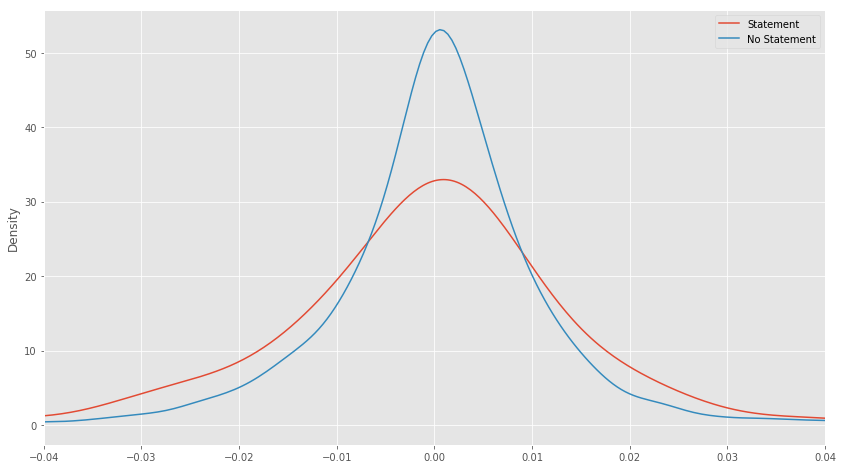

In [120]:
fig, ax = plt.subplots(figsize=(14,8))
spx_statements[spx_statements['Statement']==1]['close_pct_change'].plot.density(ax=ax,bw_method='silverman', label='Statement')
spx_statements[spx_statements['Statement']==0]['close_pct_change'].plot.density(ax=ax,bw_method='silverman', label = 'No Statement')
ax.set_xlim(-0.04,0.04)
ax.legend()


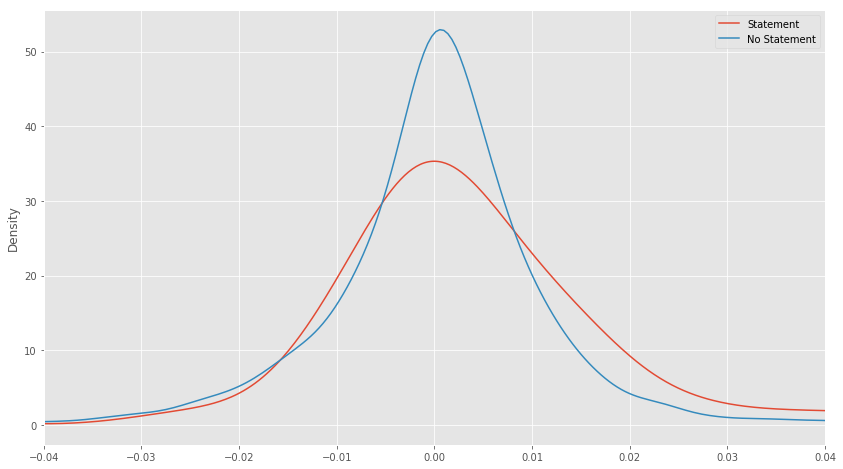

In [122]:
fig, ax = plt.subplots(figsize=(14,8))
spx_statements[spx_statements['Statement']==1]['prev_close_change'].plot.density(ax=ax,bw_method='silverman', label='Statement')
spx_statements[spx_statements['Statement']==0]['prev_close_change'].plot.density(ax=ax,bw_method='silverman', label = 'No Statement')
ax.set_xlim(-0.04,0.04)
ax.legend()

In [27]:
spx_statements[['polarity', 'subjectivity']] = spx_statements[['polarity', 'subjectivity']].fillna(value=0)
spx_statements[['LM_POS','LM_neg','CB_POS','CB_neg','word_count']] = spx_statements[['LM_POS','LM_neg','CB_POS','CB_neg','word_count']].fillna(value=0)


In [28]:
spx_nostate = spx_statements[spx_statements['Statement']==0]['close_pct_change'].dropna()
spx_yesstate=spx_statements[spx_statements['Statement']==1]['close_pct_change']

In [29]:
sm.stats.ttest_ind(spx_yesstate,spx_nostate)

(-1.4533068152620539, 0.14620371385155592, 4818.0)

In [30]:
spx_statements[spx_statements['Statement']==0]['close_pct_change'].head()

2000-01-03   -0.038312
2000-01-04    0.001922
2000-01-05    0.000956
2000-01-06    0.027090
2000-01-07    0.011190
Name: close_pct_change, dtype: float64

In [31]:
spx_statements[spx_statements['Statement']==1]['close_pct_change'].head()

2000-02-02    0.011248
2000-03-21    0.004532
2000-05-16   -0.012442
2000-06-28   -0.008544
2000-08-22    0.005233
Name: close_pct_change, dtype: float64

In [32]:
poli_leader = pd.DataFrame({'Date':spx_statements.index})

In [33]:
def chairperson(x):
    if '2006-01-31'>=str(x)>='2000-01-01':
        return 'Greenspan'
    elif '2014-01-31'>=str(x)>='2006-02-01':
        return 'Bernanke'
    elif '2018-02-03'>=str(x)>='2014-02-03':
        return 'Yellen'
    else: 
        return 'Powell'
    
def president(x):
    if '2001-01-20'>str(x)>='2000-01-01':
        return 'Clinton'
    elif '2009-01-20'>str(x)>='2001-01-20':
        return 'Bush'
    elif '2017-01-20'>str(x)>='2009-01-20':
        return 'Obama'
    else: 
        return 'Trump'

In [34]:
poli_leader['fed_chair']=poli_leader['Date'].apply(chairperson)
poli_leader['president']=poli_leader['Date'].apply(president)

In [35]:
poli_leader.head()

,Date,fed_chair,president
0,2000-01-03,Greenspan,Clinton
1,2000-01-04,Greenspan,Clinton
2,2000-01-05,Greenspan,Clinton
3,2000-01-06,Greenspan,Clinton
4,2000-01-07,Greenspan,Clinton


In [36]:
poli_leader = poli_leader.set_index(['Date'])

In [37]:
poli_leader[['fed_chair','president']]=poli_leader[['fed_chair','president']].astype('category')


In [38]:
poli_leader['fed_chair']

Date
2000-01-03    Greenspan
2000-01-04    Greenspan
2000-01-05    Greenspan
2000-01-06    Greenspan
2000-01-07    Greenspan
2000-01-10    Greenspan
2000-01-11    Greenspan
2000-01-12    Greenspan
2000-01-13    Greenspan
2000-01-14    Greenspan
2000-01-18    Greenspan
2000-01-19    Greenspan
2000-01-20    Greenspan
2000-01-21    Greenspan
2000-01-24    Greenspan
2000-01-25    Greenspan
2000-01-26    Greenspan
2000-01-27    Greenspan
2000-01-28    Greenspan
2000-01-31    Greenspan
2000-02-01    Greenspan
2000-02-02    Greenspan
2000-02-03    Greenspan
2000-02-04    Greenspan
2000-02-07    Greenspan
2000-02-08    Greenspan
2000-02-09    Greenspan
2000-02-10    Greenspan
2000-02-11    Greenspan
2000-02-14    Greenspan
                ...    
2019-01-17       Powell
2019-01-18       Powell
2019-01-22       Powell
2019-01-23       Powell
2019-01-24       Powell
2019-01-25       Powell
2019-01-28       Powell
2019-01-29       Powell
2019-01-30       Powell
2019-01-31       Powell
2019-02-01 

In [39]:
spx_statements=spx_statements.join(poli_leader,how='inner')

In [40]:
spx_statements[spx_statements['Summary of Econ Projections']==1]['close_pct_change'].describe()

count    46.000000
mean     -0.000870
std       0.014642
min      -0.033120
25%      -0.007792
50%       0.000349
75%       0.006571
max       0.025804
Name: close_pct_change, dtype: float64

In [41]:
from pandas.plotting import autocorrelation_plot

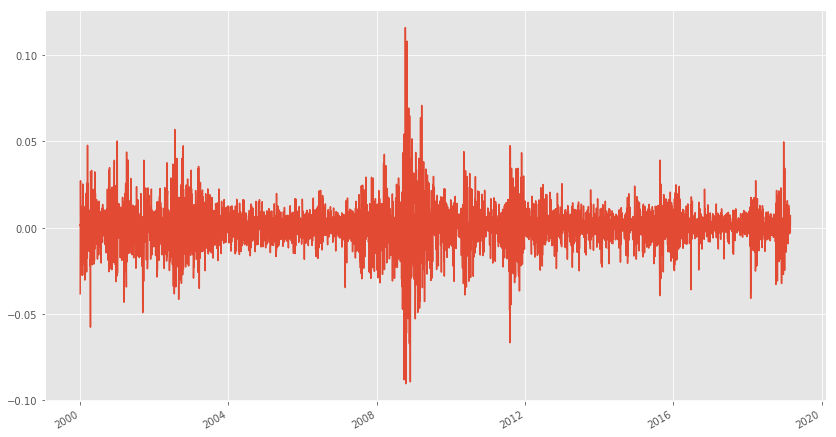

In [42]:
spx_statements['close_pct_change'].plot(figsize=(14,8))

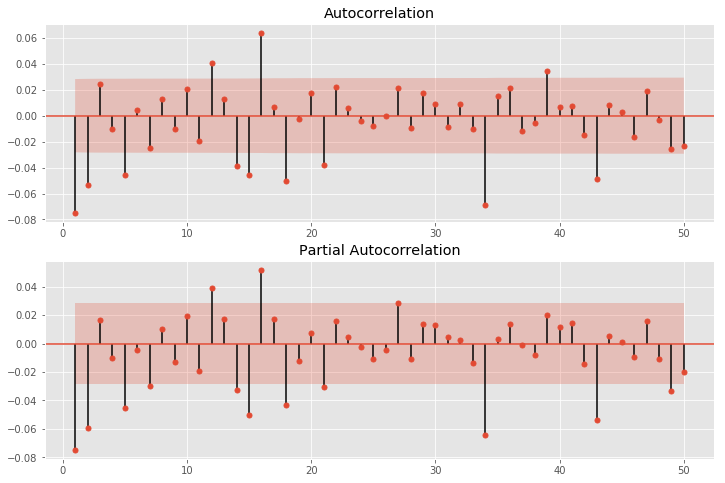

In [43]:
fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(spx_statements.dropna()['Close'].values,lags = 40,ax=ax1)
ax2=fig.add_subplot(211)

fig=sm.graphics.tsa.plot_acf(spx_statements.dropna()['close_pct_change'].values,lags = 50,ax=ax2,zero=False)
ax3=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(spx_statements.dropna()['close_pct_change'].values, lags=50, ax=ax3,zero=False)

In [44]:
sm.tsa.acf(spx_statements.dropna()['close_pct_change'],nlags = 40)

array([ 1.00000000e+00, -7.47270526e-02, -5.35277130e-02,  2.47141294e-02,
       -1.02067102e-02, -4.54464201e-02,  4.40729913e-03, -2.47218700e-02,
        1.28003957e-02, -1.05523929e-02,  2.04557465e-02, -1.96135272e-02,
        4.08845623e-02,  1.29501636e-02, -3.84351717e-02, -4.58344418e-02,
        6.38291498e-02,  6.42115078e-03, -5.05216738e-02, -2.61401822e-03,
        1.73215755e-02, -3.77046129e-02,  2.23082800e-02,  5.84714323e-03,
       -3.99685205e-03, -8.11305907e-03, -5.11225551e-04,  2.13902105e-02,
       -9.51493339e-03,  1.72690420e-02,  9.31647933e-03, -8.99875144e-03,
        9.00365511e-03, -1.00910349e-02, -6.89452075e-02,  1.49305959e-02,
        2.12184426e-02, -1.14315783e-02, -5.85511085e-03,  3.40775768e-02,
        6.54797658e-03])

In [45]:
spx_statements['Close'].autocorr(lag=500)

0.7838627732618095

In [46]:
from pandas.plotting import lag_plot

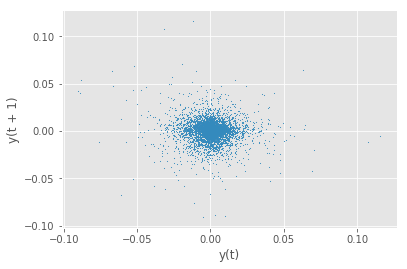

In [47]:
lag_plot(spx_statements['close_pct_change'], s= 0.3)

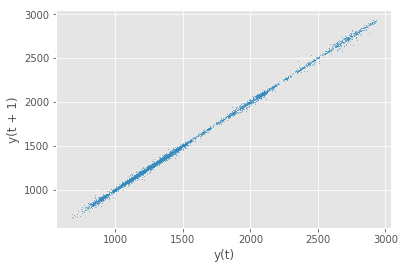

In [48]:
lag_plot(spx_statements['Close'],s =0.1)

In [49]:
arma_mod = sm.tsa.ARMA(spx_statements.dropna()['close_pct_change'], (2,0)).fit(disp=False)

C:\Users\makmi\Anaconda3\envs\econ_490\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\makmi\Anaconda3\envs\econ_490\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\makmi\Anaconda3\envs\econ_490\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either i

In [50]:
arma_mod.params

const                     0.000207
ar.L1.close_pct_change   -0.079152
ar.L2.close_pct_change   -0.059426
dtype: float64

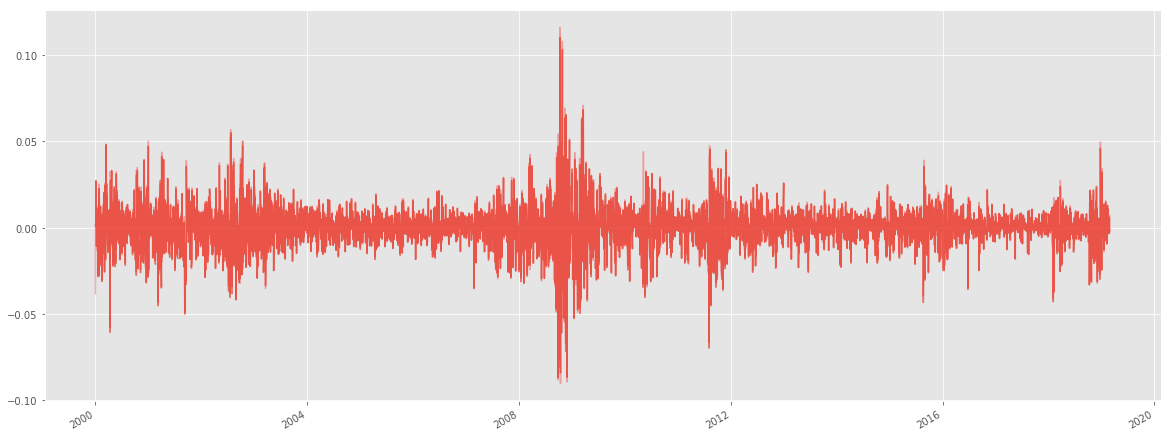

In [51]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax = arma_mod.resid.plot(ax=ax,alpha=0.7);
spx_statements['close_pct_change'].plot(ax=ax,c='red',alpha=0.3)

In [52]:
from scipy import stats
stats.normaltest(arma_mod.resid)

NormaltestResult(statistic=770.0980413467095, pvalue=5.961218757257777e-168)

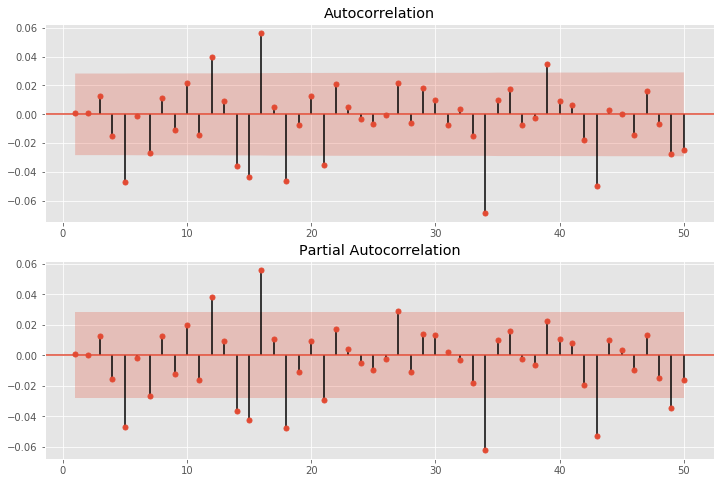

In [53]:
fig = plt.figure(figsize=(12,8))
#ax1 = fig.add_subplot(211)
#fig = sm.graphics.tsa.plot_acf(spx_statements.dropna()['Close'].values,lags = 40,ax=ax1)
ax2=fig.add_subplot(211)

fig=sm.graphics.tsa.plot_acf(arma_mod.resid,lags = 50,ax=ax2,zero=False)
ax3=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arma_mod.resid, lags=50, ax=ax3,zero=False)

In [54]:

len(arma_mod.resid)

4814

In [55]:
resid=pd.DataFrame({'residuals':arma_mod.resid})


In [56]:
spx_statements = spx_statements.join(resid,how='inner')

In [57]:
spx_statements

,Open,High,Low,Close,Volume,Summary of Econ Projections,polarity,subjectivity,LM_POS,LM_neg,...,close_pct_change,prev_close_change,two_pct_change,three_pct_change,four_pct_change,five_pct_change,open_pct_change,fed_chair,president,residuals
2000-01-04,1455.21997,1455.21997,1397.43005,1399.42004,1.216500e+09,0.0,0.000000,0.000000,0.0,0.0,...,0.001922,-0.038312,0.002880,0.030048,0.041574,0.027969,-0.009549,Greenspan,Clinton,0.001715
2000-01-05,1399.42004,1413.27002,1377.68005,1402.10999,1.422400e+09,0.0,0.000000,0.000000,0.0,0.0,...,0.000956,0.001922,0.028072,0.039576,0.025997,0.021346,-0.038345,Greenspan,Clinton,0.000877
2000-01-06,1402.10999,1411.90002,1392.02002,1403.44995,1.322900e+09,0.0,0.000000,0.000000,0.0,0.0,...,0.027090,0.000956,0.038584,0.025017,0.020371,0.032940,0.001922,Greenspan,Clinton,0.027045
2000-01-07,1403.44995,1441.46997,1400.72998,1441.46997,1.472800e+09,0.0,0.000000,0.000000,0.0,0.0,...,0.011190,0.027090,-0.002019,-0.006542,0.005696,0.016428,0.000956,Greenspan,Clinton,0.013155
2000-01-10,1441.46997,1464.35999,1441.46997,1457.59998,1.290900e+09,0.0,0.000000,0.000000,0.0,0.0,...,-0.013063,0.011190,-0.017536,-0.005434,0.005180,-0.001688,0.027090,Greenspan,Clinton,-0.010803
2000-01-11,1457.59998,1458.66003,1434.42004,1438.56006,1.286600e+09,0.0,0.000000,0.000000,0.0,0.0,...,-0.004532,-0.013063,0.007730,0.018484,0.011525,0.012054,0.011190,Greenspan,Clinton,-0.005137
2000-01-12,1438.56006,1442.59998,1427.07996,1432.04004,1.234700e+09,0.0,0.000000,0.000000,0.0,0.0,...,0.012318,-0.004532,0.023121,0.016131,0.016662,0.009448,-0.013063,Greenspan,Clinton,0.010947
2000-01-13,1432.25000,1454.19995,1432.25000,1449.68005,1.162300e+09,0.0,0.000000,0.000000,0.0,0.0,...,0.010671,0.012318,0.003766,0.004291,-0.002835,-0.005739,-0.004386,Greenspan,Clinton,0.011141
2000-01-14,1449.68005,1473.00000,1449.68005,1465.15002,1.314500e+09,0.0,0.000000,0.000000,0.0,0.0,...,-0.006832,0.010671,-0.006313,-0.013364,-0.016237,-0.043320,0.012170,Greenspan,Clinton,-0.005491
2000-01-18,1465.15002,1465.15002,1451.30005,1455.14001,1.216000e+09,0.0,0.000000,0.000000,0.0,0.0,...,0.000522,-0.006832,-0.006577,-0.009470,-0.036739,-0.031000,0.010671,Greenspan,Clinton,0.000380


In [58]:
pd.DataFrame(spx_statements[spx_statements['Statement']==0]['residuals'].describe())

,residuals
count,4652.000000
mean,0.000049
std,0.011837
min,-0.086868
25%,-0.004946
50%,0.000520
75%,0.005371
max,0.110108


In [59]:
pd.DataFrame(spx_statements[spx_statements['Statement']==1]['residuals'].describe())

,residuals
count,162.000000
mean,-0.001392
std,0.015095
min,-0.080710
25%,-0.008336
50%,0.000223
75%,0.006243
max,0.037794


In [60]:
sm.stats.ttest_ind(spx_statements[spx_statements['Statement']==1]['residuals'],
                   spx_statements[spx_statements['Statement']==0]['residuals'])

(-1.5064614151228868, 0.13201440479635038, 4812.0)

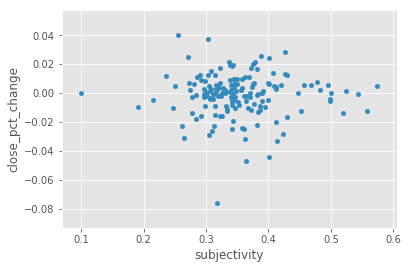

In [61]:
spx_statements[spx_statements['Statement']==1].plot.scatter('subjectivity','close_pct_change')

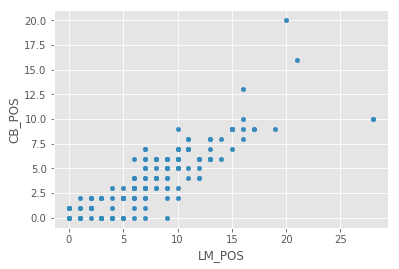

In [62]:
spx_statements[spx_statements['Statement']==1].plot.scatter('LM_POS','CB_POS')

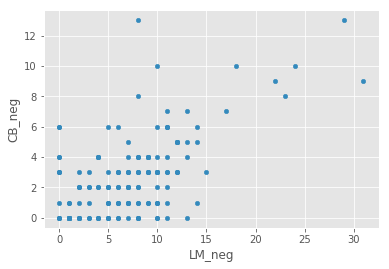

In [63]:
spx_statements[spx_statements['Statement']==1].plot.scatter('LM_neg','CB_neg')

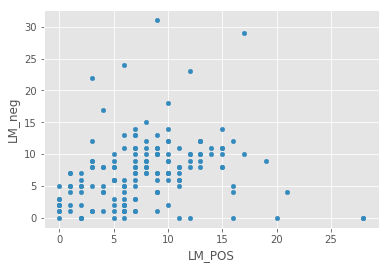

In [64]:
spx_statements[spx_statements['Statement']==1].plot.scatter('LM_POS','LM_neg')

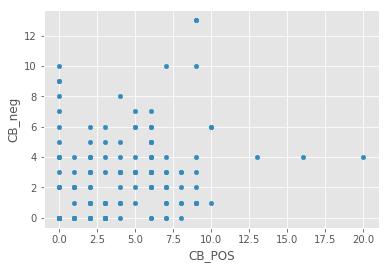

In [65]:
spx_statements[spx_statements['Statement']==1].plot.scatter('CB_POS','CB_neg')

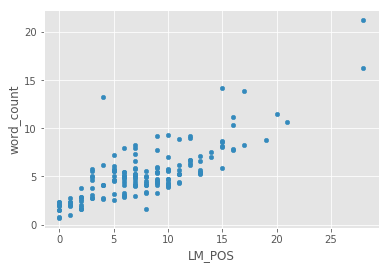

In [66]:
spx_statements[spx_statements['Statement']==1].plot.scatter('LM_POS','word_count')

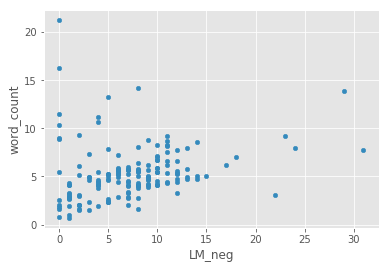

In [67]:
spx_statements[spx_statements['Statement']==1].plot.scatter('LM_neg','word_count')

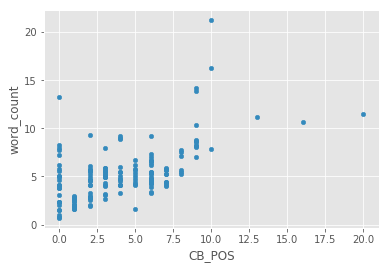

In [68]:
spx_statements[spx_statements['Statement']==1].plot.scatter('CB_POS','word_count')

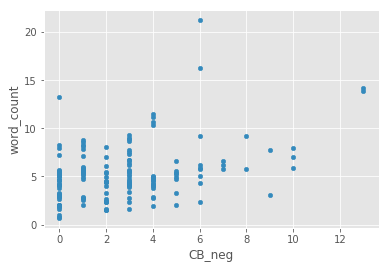

In [69]:
spx_statements[spx_statements['Statement']==1].plot.scatter('CB_neg','word_count')

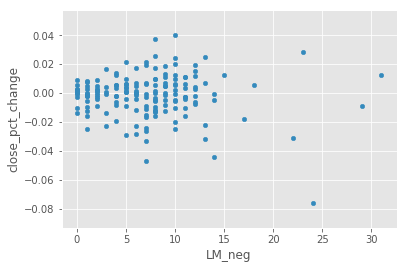

In [70]:
spx_statements[spx_statements['Statement']==1].plot.scatter('LM_neg','close_pct_change')

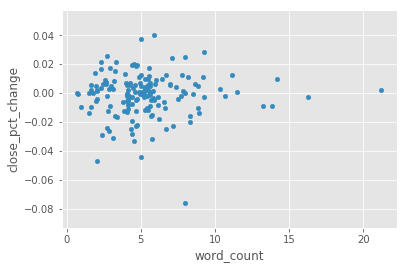

In [71]:
spx_statements[spx_statements['Statement']==1].plot.scatter('word_count','close_pct_change')

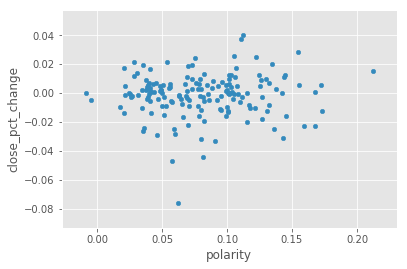

In [72]:
spx_statements[spx_statements['Statement']==1].plot.scatter('polarity','close_pct_change')

In [109]:
results = sm.formula.ols('close_pct_change ~ polarity + subjectivity', data=spx_statements[spx_statements['Statement']==1]).fit()

In [110]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1920
Date:                Sat, 20 Apr 2019   Prob (F-statistic):              0.826
Time:                        14:55:21   Log-Likelihood:                 451.81
No. Observations:                 162   AIC:                            -897.6
Df Residuals:                     159   BIC:                            -888.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0022      0.007     -0.329   

In [112]:
pol_results = sm.formula.ols('close_pct_change ~ polarity', data=spx_statements[spx_statements['Statement']==1]).fit()
print(pol_results.summary())

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3733
Date:                Sat, 20 Apr 2019   Prob (F-statistic):              0.542
Time:                        14:57:15   Log-Likelihood:                 451.80
No. Observations:                 162   AIC:                            -899.6
Df Residuals:                     160   BIC:                            -893.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0029      0.003     -1.080      0.2

In [114]:
subj_results = sm.formula.ols('close_pct_change ~ subjectivity', data=spx_statements[spx_statements['Statement']==1]).fit()
print(subj_results.summary())

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                  0.008183
Date:                Sat, 20 Apr 2019   Prob (F-statistic):              0.928
Time:                        14:57:41   Log-Likelihood:                 451.62
No. Observations:                 162   AIC:                            -899.2
Df Residuals:                     160   BIC:                            -893.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0009      0.006     -0.137   

In [111]:
pd.get_dummies(spx_statements,columns=['fed_chair','president']).head()

,Open,High,Low,Close,Volume,Summary of Econ Projections,polarity,subjectivity,LM_POS,LM_neg,...,residuals,abs_return,fed_chair_Bernanke,fed_chair_Greenspan,fed_chair_Powell,fed_chair_Yellen,president_Bush,president_Clinton,president_Obama,president_Trump
2000-01-04,1455.21997,1455.21997,1397.43005,1399.42004,1.216500e+09,0.0,0.0,0.0,0.0,0.0,...,0.001715,0.001922,0,1,0,0,0,1,0,0
2000-01-05,1399.42004,1413.27002,1377.68005,1402.10999,1.422400e+09,0.0,0.0,0.0,0.0,0.0,...,0.000877,0.000956,0,1,0,0,0,1,0,0
2000-01-06,1402.10999,1411.90002,1392.02002,1403.44995,1.322900e+09,0.0,0.0,0.0,0.0,0.0,...,0.027045,0.027090,0,1,0,0,0,1,0,0
2000-01-07,1403.44995,1441.46997,1400.72998,1441.46997,1.472800e+09,0.0,0.0,0.0,0.0,0.0,...,0.013155,0.011190,0,1,0,0,0,1,0,0
2000-01-10,1441.46997,1464.35999,1441.46997,1457.59998,1.290900e+09,0.0,0.0,0.0,0.0,0.0,...,-0.010803,0.013063,0,1,0,0,0,1,0,0


In [76]:
results_2 = sm.formula.ols('residuals ~ polarity + subjectivity +C(president)', data=spx_statements).fit()

In [77]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:              residuals   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.548
Date:                Sat, 20 Apr 2019   Prob (F-statistic):              0.171
Time:                        14:36:34   Log-Likelihood:                 14480.
No. Observations:                4814   AIC:                        -2.895e+04
Df Residuals:                    4808   BIC:                        -2.891e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [78]:
results_3 = sm.formula.ols('close_pct_change ~Statement +C(president) +C(fed_chair)', data=spx_statements).fit()

In [79]:
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.168
Date:                Sat, 20 Apr 2019   Prob (F-statistic):              0.318
Time:                        14:36:34   Log-Likelihood:                 14459.
No. Observations:                4814   AIC:                        -2.890e+04
Df Residuals:                    4806   BIC:                        -2.885e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [108]:
pre_fomc_results = sm.formula.ols('prev_close_change ~Statement +C(president) +C(fed_chair)', data=spx_statements).fit()
print(pre_fomc_results.summary())

                            OLS Regression Results                            
Dep. Variable:      prev_close_change   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.238
Date:                Sat, 20 Apr 2019   Prob (F-statistic):             0.0285
Time:                        14:38:34   Log-Likelihood:                 14451.
No. Observations:                4814   AIC:                        -2.889e+04
Df Residuals:                    4806   BIC:                        -2.883e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Percent change on open price change as dependent variable.

In [80]:
open_results = sm.formula.ols('open_pct_change ~Statement +C(president) +C(fed_chair)', data=spx_statements).fit()
print(open_results.summary())

                            OLS Regression Results                            
Dep. Variable:        open_pct_change   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8054
Date:                Sat, 20 Apr 2019   Prob (F-statistic):              0.583
Time:                        14:36:34   Log-Likelihood:                 14629.
No. Observations:                4814   AIC:                        -2.924e+04
Df Residuals:                    4806   BIC:                        -2.919e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [81]:
spx_statements['abs_return']=spx_statements['close_pct_change'].abs()

In [82]:
results_4 = sm.formula.ols('abs_return ~Statement +C(president) +C(fed_chair)', data=spx_statements).fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     27.22
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           6.63e-37
Time:                        14:36:34   Log-Likelihood:                 15957.
No. Observations:                4814   AIC:                        -3.190e+04
Df Residuals:                    4806   BIC:                        -3.185e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [83]:
spx_statements['abs_return'].describe()

count    4814.000000
mean        0.008000
std         0.008969
min         0.000000
25%         0.002164
50%         0.005335
75%         0.010687
max         0.115800
Name: abs_return, dtype: float64

In [84]:
results_5 = sm.formula.ols('abs_return ~polarity+ subjectivity', data=spx_statements).fit()
print(results_5.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.139
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           0.000296
Time:                        14:36:34   Log-Likelihood:                 15871.
No. Observations:                4814   AIC:                        -3.174e+04
Df Residuals:                    4811   BIC:                        -3.172e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0079      0.000     60.346   

In [85]:
statement_result = sm.formula.ols('abs_return ~polarity+ subjectivity', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.549
Date:                Sat, 20 Apr 2019   Prob (F-statistic):              0.216
Time:                        14:36:34   Log-Likelihood:                 505.97
No. Observations:                 162   AIC:                            -1006.
Df Residuals:                     159   BIC:                            -996.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0100      0.005      2.097   

In [86]:
two_period_result = sm.formula.ols('two_pct_change ~ polarity + subjectivity', data=spx_statements).fit()
print(two_period_result.summary())

                            OLS Regression Results                            
Dep. Variable:         two_pct_change   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.754
Date:                Sat, 20 Apr 2019   Prob (F-statistic):              0.173
Time:                        14:36:34   Log-Likelihood:                 12976.
No. Observations:                4814   AIC:                        -2.595e+04
Df Residuals:                    4811   BIC:                        -2.593e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0005      0.000      2.047   

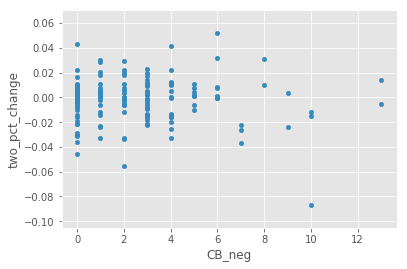

In [87]:
spx_statements[spx_statements['Statement']==1].plot.scatter('CB_neg','two_pct_change')

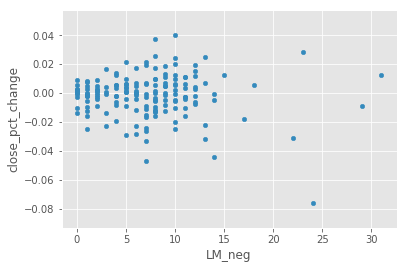

In [88]:
spx_statements[spx_statements['Statement']==1].plot.scatter('LM_neg','close_pct_change')

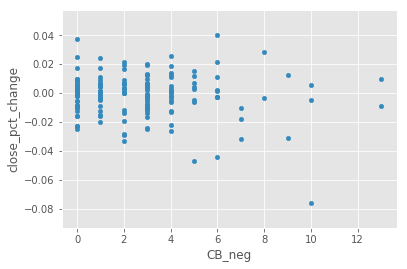

In [89]:
spx_statements[spx_statements['Statement']==1].plot.scatter('CB_neg','close_pct_change')

In [90]:
five_period_result = sm.formula.ols('five_pct_change ~ polarity + subjectivity', data=spx_statements).fit()
print(five_period_result.summary())

                            OLS Regression Results                            
Dep. Variable:        five_pct_change   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9095
Date:                Sat, 20 Apr 2019   Prob (F-statistic):              0.403
Time:                        14:36:35   Log-Likelihood:                 11044.
No. Observations:                4814   AIC:                        -2.208e+04
Df Residuals:                    4811   BIC:                        -2.206e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0011      0.000      3.034   

In [91]:
pd.DataFrame(spx_statements[spx_statements['Statement']==0]['two_pct_change'].describe())

,two_pct_change
count,4652.000000
mean,0.000490
std,0.016283
min,-0.124174
25%,-0.007026
50%,0.001065
75%,0.008731
max,0.132064


In [92]:
pd.DataFrame(spx_statements[spx_statements['Statement']==1]['two_pct_change'].describe())

,two_pct_change
count,162.000000
mean,-0.001820
std,0.017865
min,-0.087031
25%,-0.012055
50%,0.000152
75%,0.007418
max,0.052058


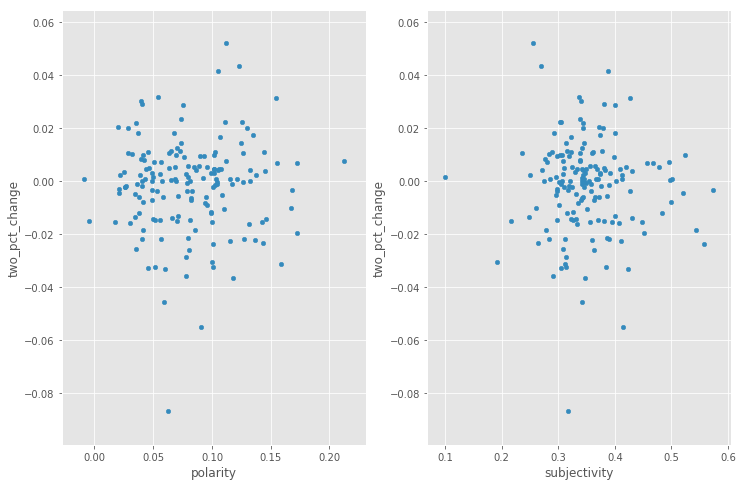

In [93]:
fig_2 = plt.figure(figsize=(12,8))
ax_1= fig_2.add_subplot(121)
spx_statements[spx_statements['Statement']==1].plot.scatter('polarity','two_pct_change',ax=ax_1)

ax_2= fig_2.add_subplot(122)
spx_statements[spx_statements['Statement']==1].plot.scatter('subjectivity','two_pct_change',ax=ax_2)

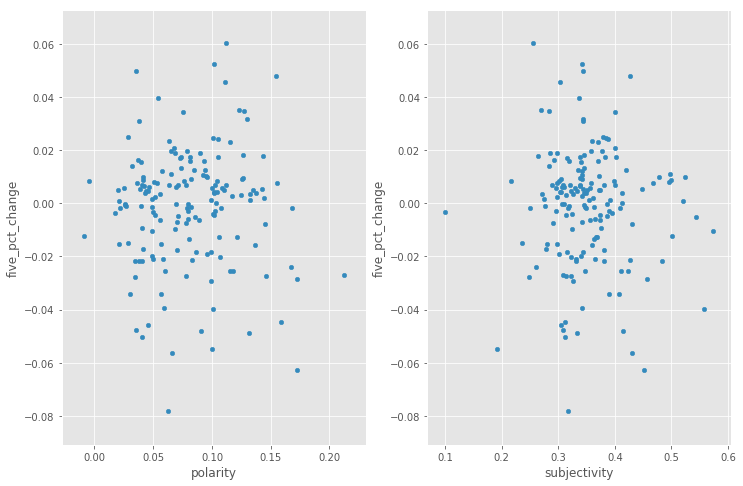

In [94]:
fig_3 = plt.figure(figsize=(12,8))
ax_1= fig_3.add_subplot(121)
spx_statements[spx_statements['Statement']==1].plot.scatter('polarity','five_pct_change',ax=ax_1)

ax_2= fig_3.add_subplot(122)
spx_statements[spx_statements['Statement']==1].plot.scatter('subjectivity','five_pct_change',ax=ax_2)

In [95]:
statement_result = sm.formula.ols('abs_return ~ subjectivity+C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.249
Date:                Sat, 20 Apr 2019   Prob (F-statistic):             0.0332
Time:                        14:36:36   Log-Likelihood:                 512.29
No. Observations:                 162   AIC:                            -1009.
Df Residuals:                     154   BIC:                            -983.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [96]:
statement_result = sm.formula.ols('abs_return ~ subjectivity+C(president) +C(fed_chair)', data=spx_statements).fit()
print(statement_result.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     26.92
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           1.77e-36
Time:                        14:36:36   Log-Likelihood:                 15956.
No. Observations:                4814   AIC:                        -3.190e+04
Df Residuals:                    4806   BIC:                        -3.184e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [97]:
statement_result = sm.formula.ols('abs_return ~ polarity+subjectivity+C(president) +C(fed_chair)', data=spx_statements).fit()
print(statement_result.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     24.11
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           1.17e-36
Time:                        14:36:36   Log-Likelihood:                 15958.
No. Observations:                4814   AIC:                        -3.190e+04
Df Residuals:                    4805   BIC:                        -3.184e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

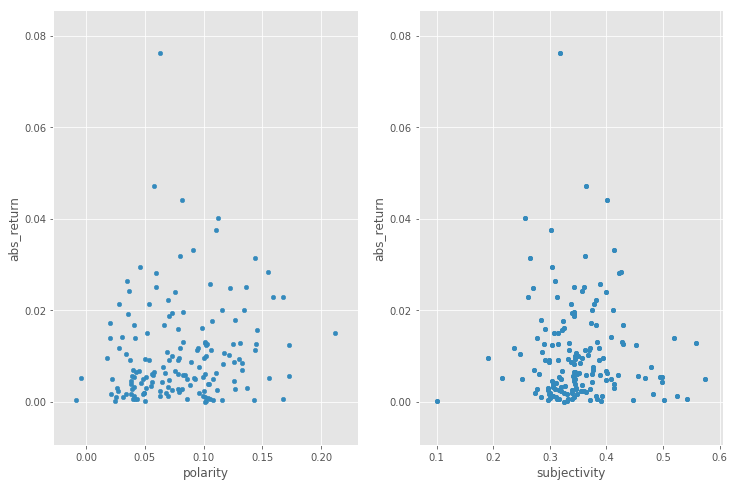

In [98]:
fig_3 = plt.figure(figsize=(12,8))
ax_1= fig_3.add_subplot(121)
spx_statements[spx_statements['Statement']==1].plot.scatter('polarity','abs_return',ax=ax_1)

ax_2= fig_3.add_subplot(122)
spx_statements[spx_statements['Statement']==1].plot.scatter('subjectivity','abs_return',ax=ax_2)
spx_statements[spx_statements['Statement']==1].plot.scatter('subjectivity','abs_return',ax=ax_2)


In [99]:
statement_result = sm.formula.ols('abs_return ~ subjectivity+C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.249
Date:                Sat, 20 Apr 2019   Prob (F-statistic):             0.0332
Time:                        14:36:37   Log-Likelihood:                 512.29
No. Observations:                 162   AIC:                            -1009.
Df Residuals:                     154   BIC:                            -983.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [100]:
spx_statements.reset_index().to_csv('dataset.csv')

In [101]:
statement_result.summary().as_latex

<bound method Summary.as_latex of <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.249
Date:                Sat, 20 Apr 2019   Prob (F-statistic):             0.0332
Time:                        14:36:37   Log-Likelihood:                 512.29
No. Observations:                 162   AIC:                            -1009.
Df Residuals:                     154   BIC:                            -983.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [102]:
sm.tsa.stattools.adfuller(spx_statements['close_pct_change'],regression='c')

(-16.212377706703354,
 3.97419222854547e-29,
 20,
 4793,
 {'1%': -3.4317150752448122,
  '5%': -2.8621432099133135,
  '10%': -2.5670910903532254},
 -28796.12209797174)

In [103]:
statement_result = sm.formula.ols('abs_return ~ polarity+C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2.057
Date:                Sat, 20 Apr 2019   Prob (F-statistic):             0.0514
Time:                        14:36:37   Log-Likelihood:                 511.64
No. Observations:                 162   AIC:                            -1007.
Df Residuals:                     154   BIC:                            -982.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [104]:
statement_result = sm.formula.ols('close_pct_change ~CB_POS+CB_neg +C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.955
Date:                Sat, 20 Apr 2019   Prob (F-statistic):             0.0557
Time:                        14:36:37   Log-Likelihood:                 459.50
No. Observations:                 162   AIC:                            -901.0
Df Residuals:                     153   BIC:                            -873.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [105]:
statement_result = sm.formula.ols('close_pct_change ~ LM_POS+ LM_neg +C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.366
Date:                Sat, 20 Apr 2019   Prob (F-statistic):              0.215
Time:                        14:36:37   Log-Likelihood:                 457.20
No. Observations:                 162   AIC:                            -896.4
Df Residuals:                     153   BIC:                            -868.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [106]:
statement_result = sm.formula.ols('close_pct_change ~ word_count+C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())

                            OLS Regression Results                            
Dep. Variable:       close_pct_change   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.599
Date:                Sat, 20 Apr 2019   Prob (F-statistic):              0.139
Time:                        14:36:37   Log-Likelihood:                 457.30
No. Observations:                 162   AIC:                            -898.6
Df Residuals:                     154   BIC:                            -873.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [123]:
statement_result = sm.formula.ols('abs_return ~ word_count+C(president) +C(fed_chair)', data=spx_statements[spx_statements['Statement']==1]).fit()
print(statement_result.summary())

                            OLS Regression Results                            
Dep. Variable:             abs_return   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.749
Date:                Sat, 20 Apr 2019   Prob (F-statistic):              0.102
Time:                        20:17:57   Log-Likelihood:                 510.60
No. Observations:                 162   AIC:                            -1005.
Df Residuals:                     154   BIC:                            -980.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             